In [1]:
import sys
sys.path.insert(0, 'C:\\Users\\kaspr\\Documents\\Studia\\gcpBackend')
import random
import string
import os
import argparse
import pandas as pd
import shutil
from timeit import default_timer
from numpy import random as np_random
# from Algorithm.soundGeneration import generate_morse_code_audio_file
from Algorithm.MorseCodeTranslator import sound_translator
import json
from random import gauss
from scipy.io import wavfile
import numpy as np
from IPython.display import Audio
from pydub import AudioSegment
import soundfile as sf


In [2]:
with open('./Algorithm/data/morse_code.json', "r", encoding='utf-8') as file:
        morse_code = json.load(file)
    
    
dir = './Algorithm/data/processed_audios/'


In [3]:

def get_text_data(morse_code):
    texts = []
    keys = list(morse_code.keys())
    # keys += list(special_characters.keys())
    with open('./Algorithm/data/validation.txt', 'r', encoding='utf-8') as text_file:
        lines = text_file.readlines()
        for line in lines:
            line = line.strip('\n')
            # verify(line, keys)
            texts.append(line)
    return texts
    
def text_to_morse(text: str) -> str:
    text_morse = []
    # morse_code_dict = dict_morse_to_text()
    text = text.upper()
    text_morse_words = []
    for word in text.split(" "):
        text_morse_letters = []
        for letter in word:
            if letter in morse_code:
                text_morse_letters.append(morse_code[letter])
        text_morse_words.append("_".join(text_morse_letters))
    return ' '.join(text_morse_words)
# change Volume
def volume_manipul(f_list):
    return [f * gauss(1, 0.5) for f in f_list]

# path 
def generate_morse_code_audio_file(text: str, path: str):
    code = text_to_morse(text)
    samplerate, data = wavfile.read(path)
    dot_len = int(np.floor((samplerate/10)*np.random.uniform(0.9,1.1)))
    dash_len = int(np.floor(dot_len * gauss(3, 0.1)))

    # sound = []
    if data.ndim == 2:

        sound = sum([(volume_manipul(list(data[:int(dot_len*gauss(3, 0.1)), 0])) if i == '-' else (volume_manipul(list(data[:int(dot_len * gauss(1, 0.1)),0])) if i == '.' else  
                                            (list([0]*int(dot_len*gauss(1, 0.1))) if i == "_" else 
                                            list([0]*int(dot_len*gauss(5, 0.1)))))) + list([0]*int(dot_len * gauss(1, 0.1)))
                                            for i in code],[])
    else: 
        sound = sum([(volume_manipul(list(data[:int(dot_len*gauss(3, 0.1))])) if i == '-' else (volume_manipul(list(data[:int(dot_len * gauss(1, 0.1))])) if i == '.' else  
                                            (list([0]*int(dot_len * gauss(1, 0.1))) if i == "_" else 
                                            list([0]*int(dot_len*gauss(5, 0.1)))))) + list([0]*int(dot_len * gauss(1, 0.1)))
                                            for i in code], [])
    noise  = np.random.normal(0, np.random.uniform(0, 0.1)*np.std(sound), len(sound))
    data =  sound + noise
    # print(data)
    normalized_audio_data = data / np.max(np.abs(data))
    return normalized_audio_data, samplerate


In [123]:
np.std(sound)

16431.258522668235

In [ ]:
sum([(volume_manipul(list(data[:int(dot_len*gauss(3, 0.1))])) if i == '-' else (volume_manipul(list(data[:int(dot_len * gauss(1, 0.1))])) if i == '.' else  
                                            (list([0]*int(dot_len * gauss(1, 0.1))) if i == "_" else 
                                            list([0]*int(dot_len*gauss(5, 0.1)))))) + list([0]*int(dot_len * gauss(1, 0.1)))
                                            for i in code], [])

In [66]:
code = translator('Ala ma kota')
samplerate, data = wavfile.read('/Users/zuzannaglinka/gcpBackend/Algorithm/data/processed_audios/beep-05.wav',)
dot_len = int(np.floor((samplerate/10)*np.random.uniform(0.9,1.1)))
dash_len = int(np.floor(dot_len * gauss(3, 0.1)))

sound = []

In [116]:
[1,2,3,4]+ np.random.normal(0, np.random.uniform(0, 0.1)*np.std(sound), 4)

array([ 134.7735738 , -102.89320363, 1655.38224881, -466.83488756])

In [121]:
a = np.random.normal(0, np.random.uniform(0, 0.1)*np.std(sound), 4)
a

array([ 65.97411185, 124.64441452,   3.48412304, -82.31081939])

In [118]:
[1]+[3]

[1, 3]

In [122]:
a +[1,2,3,4]

array([ 66.97411185, 126.64441452,   6.48412304, -78.31081939])

In [117]:
sum([[1],[2],[1,2,3]], [])

[1, 2, 1, 2, 3]

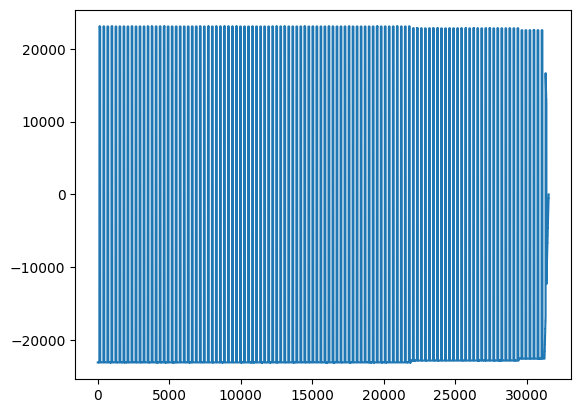

In [78]:
plt.plot(data)

In [60]:
code

'.-_.-.._.-_ _--_.-_ _-.-_---_-_.-'

In [69]:
import matplotlib.pyplot as plt 

/var/folders/dc/tm97_rl10kj62c4gsppshgm80000gn/T/ipykernel_24685/1102319226.py:32: WavFileWarning: Chunk (non-data) not understood, skipping it.
  samplerate, data = wavfile.read(path)


Text(0, 0.5, 'Amplitude')

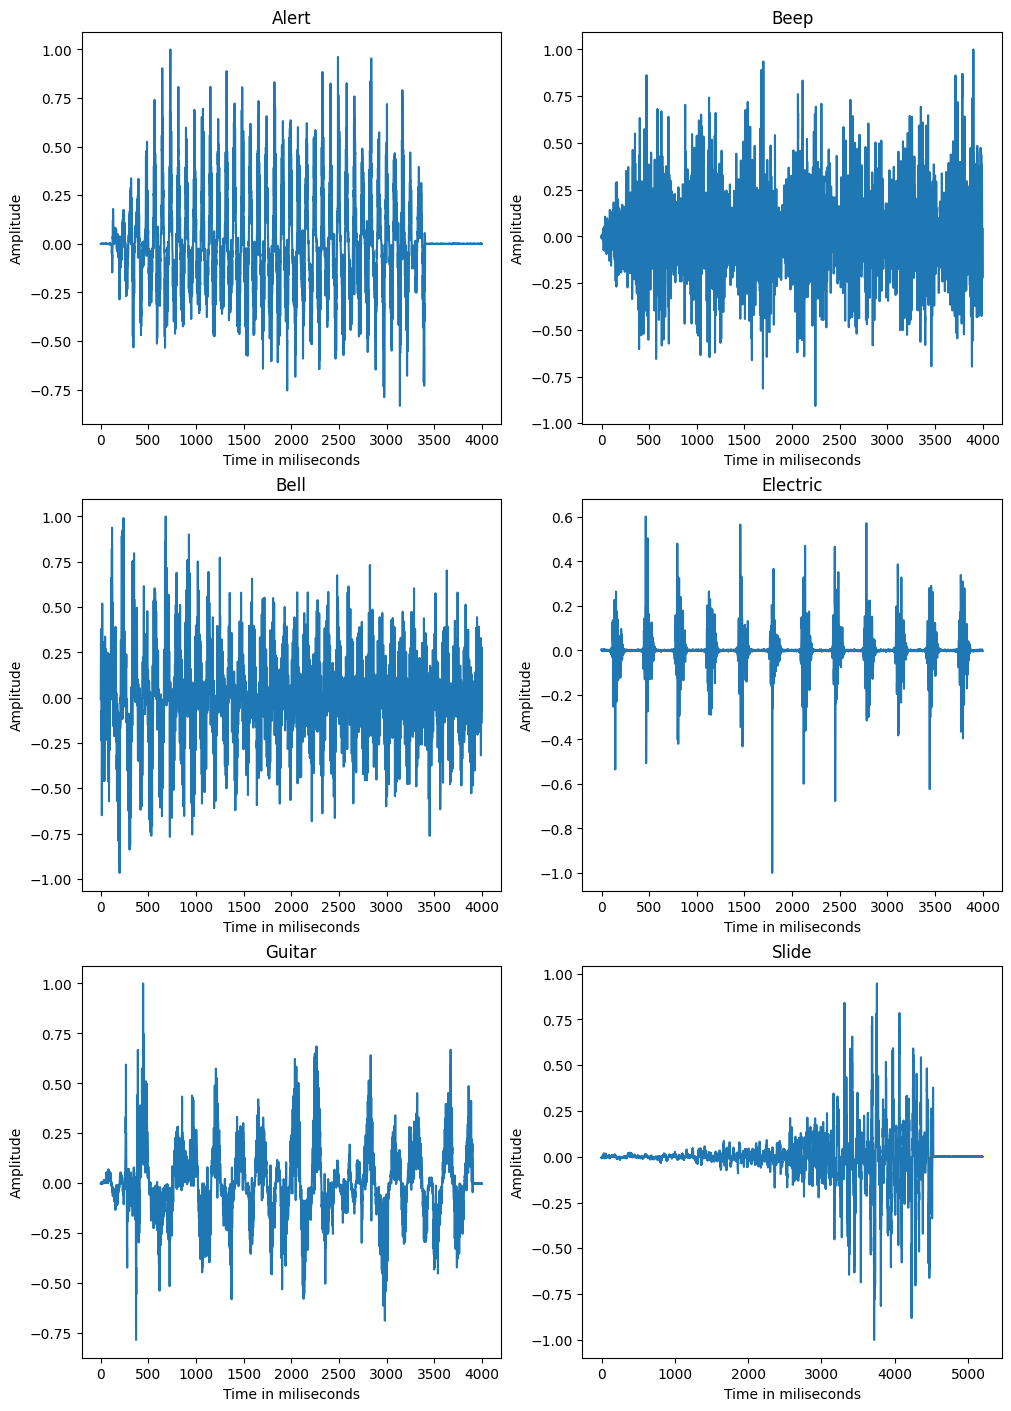

In [128]:
figure, axis = plt.subplots( 3, 2, figsize = (10, 14),constrained_layout=True) 
# figure.figsize(2800, 2100)
# figure.tight_layout() 
samples1, samplerate1 = generate_morse_code_audio_file('e', '/Users/zuzannaglinka/gcpBackend/Algorithm/data/processed_audios/alert.wav')
axis[0, 0].plot(samples1[:4000])
axis[0, 0].set_title("Alert") 
axis[0, 0].set_xlabel('Time in miliseconds')
axis[0, 0].set_ylabel('Amplitude')

samples1, samplerate1 = generate_morse_code_audio_file('e', '/Users/zuzannaglinka/gcpBackend/Algorithm/data/processed_audios/beep2.wav')
axis[0, 1].plot(samples1[:4000])
axis[0, 1].set_title("Beep") 
axis[0, 1].set_xlabel('Time in miliseconds')
axis[0, 1].set_ylabel('Amplitude')

samples1, samplerate1 = generate_morse_code_audio_file('e', '/Users/zuzannaglinka/gcpBackend/Algorithm/data/processed_audios/bell.wav')
axis[1, 0].plot(samples1[:4000])
axis[1, 0].set_title("Bell") 
axis[1, 0].set_xlabel('Time in miliseconds')
axis[1, 0].set_ylabel('Amplitude')

samples1, samplerate1 = generate_morse_code_audio_file('e', '/Users/zuzannaglinka/gcpBackend/Algorithm/data/processed_audios/electric.wav')
axis[1, 1].plot(samples1[:4000])
axis[1, 1].set_title("Electric") 
axis[1, 1].set_xlabel('Time in miliseconds')
axis[1, 1].set_ylabel('Amplitude')

samples1, samplerate1 = generate_morse_code_audio_file('e', '/Users/zuzannaglinka/gcpBackend/Algorithm/data/processed_audios/guitar.wav')
axis[2, 0].plot(samples1[:4000])
axis[2, 0].set_title("Guitar") 
axis[2, 0].set_xlabel('Time in miliseconds')
axis[2, 0].set_ylabel('Amplitude')

samples1, samplerate1 = generate_morse_code_audio_file('e', '/Users/zuzannaglinka/gcpBackend/Algorithm/data/processed_audios/slide.wav')
axis[2, 1].plot(samples1[:4000])
axis[2, 1].set_title("Slide") 
axis[2, 1].set_xlabel('Time in miliseconds')
axis[2, 1].set_ylabel('Amplitude')

# samples1, samplerate1 = generate_morse_code_audio_file('e', '/Users/zuzannaglinka/gcpBackend/Algorithm/data/processed_audios/beep2.wav')
# axis[3, 0].plot(samples1[:4000])
# axis[3, 0].set_title("Beep") 
# axis[3, 0].set_xlabel('Time in miliseconds')
# axis[3, 0].set_ylabel('Amplitude')

# samples1, samplerate1 = generate_morse_code_audio_file('e', '/Users/zuzannaglinka/gcpBackend/Algorithm/data/processed_audios/beep2.wav')
# axis[3, 1].plot(samples1[:4000])
# axis[3, 1].set_title("Beep") 
# axis[3, 1].set_xlabel('Time in miliseconds')
# axis[3, 1].set_ylabel('Amplitude')



/var/folders/dc/tm97_rl10kj62c4gsppshgm80000gn/T/ipykernel_24685/1102319226.py:32: WavFileWarning: Chunk (non-data) not understood, skipping it.
  samplerate, data = wavfile.read(path)


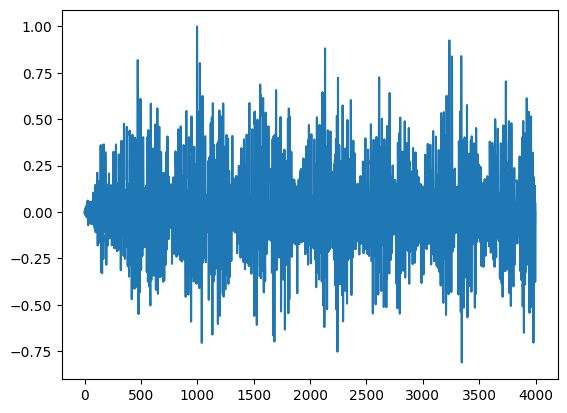

In [72]:

ax1.set_title("Beep")
ax1.set_xlabel('Time (milisecond)')
ax1.set_ylabel('Y-axis')

/var/folders/dc/tm97_rl10kj62c4gsppshgm80000gn/T/ipykernel_24685/1102319226.py:32: WavFileWarning: Chunk (non-data) not understood, skipping it.
  samplerate, data = wavfile.read(path)


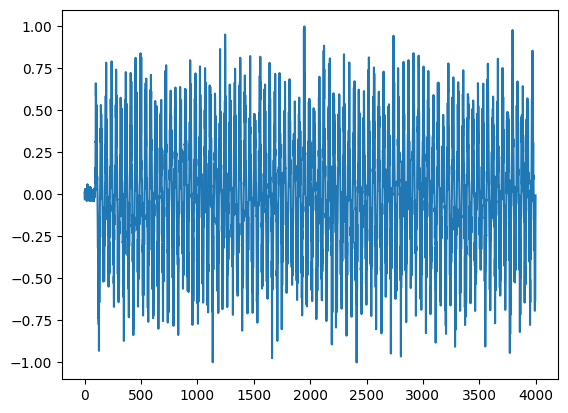

In [77]:
samples, samplerate = generate_morse_code_audio_file('e', '/Users/zuzannaglinka/gcpBackend/Algorithm/data/processed_audios/beep.wav')
plt.plot(samples[:4000])

/var/folders/dc/tm97_rl10kj62c4gsppshgm80000gn/T/ipykernel_24685/1102319226.py:32: WavFileWarning: Chunk (non-data) not understood, skipping it.
  samplerate, data = wavfile.read(path)


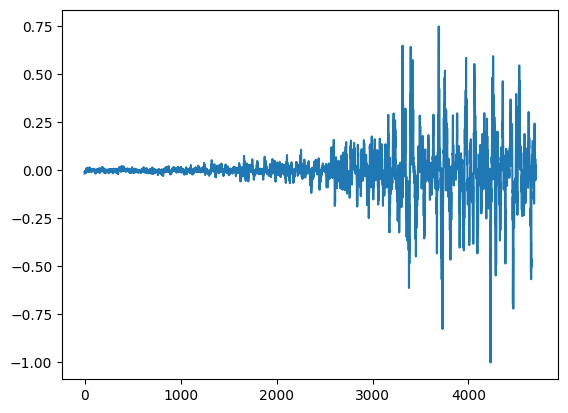

In [110]:
samples, samplerate = generate_morse_code_audio_file('e', '/Users/zuzannaglinka/gcpBackend/Algorithm/data/processed_audios/slide.wav')
plt.plot(samples[:4700])

/var/folders/dc/tm97_rl10kj62c4gsppshgm80000gn/T/ipykernel_24685/1102319226.py:32: WavFileWarning: Chunk (non-data) not understood, skipping it.
  samplerate, data = wavfile.read(path)


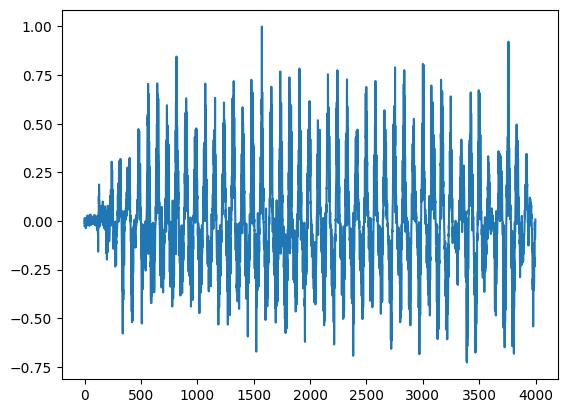

In [107]:
samples, samplerate = generate_morse_code_audio_file('e', '/Users/zuzannaglinka/gcpBackend/Algorithm/data/processed_audios/alert.wav')
plt.plot(samples[:4000])

/var/folders/dc/tm97_rl10kj62c4gsppshgm80000gn/T/ipykernel_24685/1102319226.py:32: WavFileWarning: Chunk (non-data) not understood, skipping it.
  samplerate, data = wavfile.read(path)


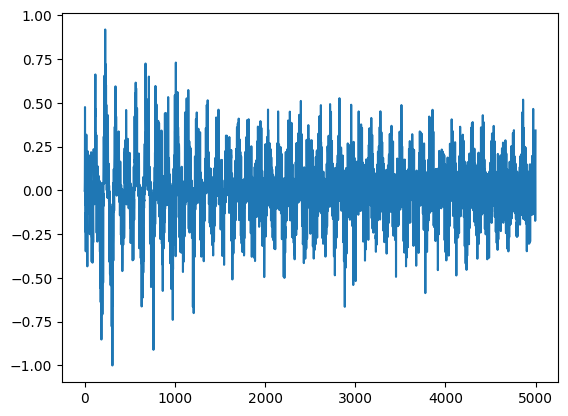

In [89]:
samples, samplerate = generate_morse_code_audio_file('e', '/Users/zuzannaglinka/gcpBackend/Algorithm/data/processed_audios/bell.wav')
plt.plot(samples[:5000])

/var/folders/dc/tm97_rl10kj62c4gsppshgm80000gn/T/ipykernel_24685/1102319226.py:32: WavFileWarning: Chunk (non-data) not understood, skipping it.
  samplerate, data = wavfile.read(path)


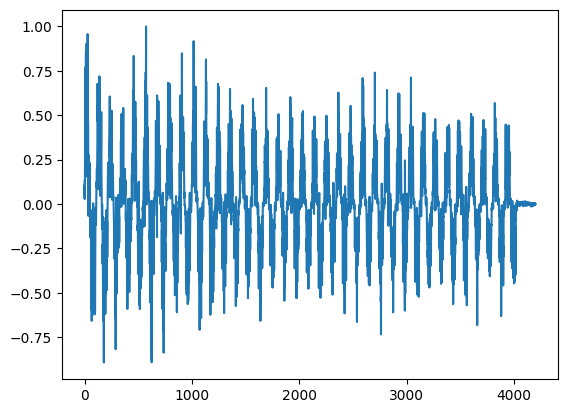

In [103]:
samples, samplerate = generate_morse_code_audio_file('e', '/Users/zuzannaglinka/gcpBackend/Algorithm/data/processed_audios/doorbell.wav')
plt.plot(samples[:4200])

/var/folders/dc/tm97_rl10kj62c4gsppshgm80000gn/T/ipykernel_24685/1102319226.py:32: WavFileWarning: Chunk (non-data) not understood, skipping it.
  samplerate, data = wavfile.read(path)


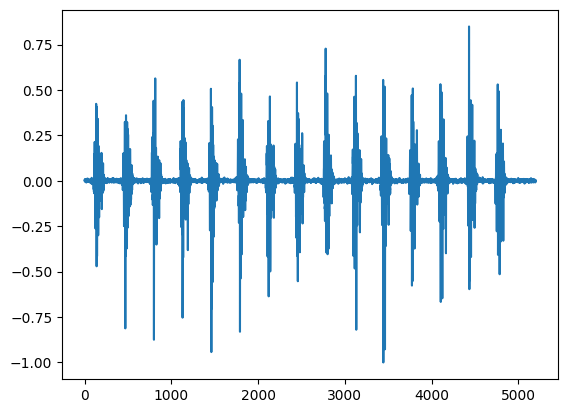

In [98]:
samples, samplerate = generate_morse_code_audio_file('e', '/Users/zuzannaglinka/gcpBackend/Algorithm/data/processed_audios/electric.wav')
plt.plot(samples[:5200])

/var/folders/dc/tm97_rl10kj62c4gsppshgm80000gn/T/ipykernel_24685/1102319226.py:32: WavFileWarning: Chunk (non-data) not understood, skipping it.
  samplerate, data = wavfile.read(path)


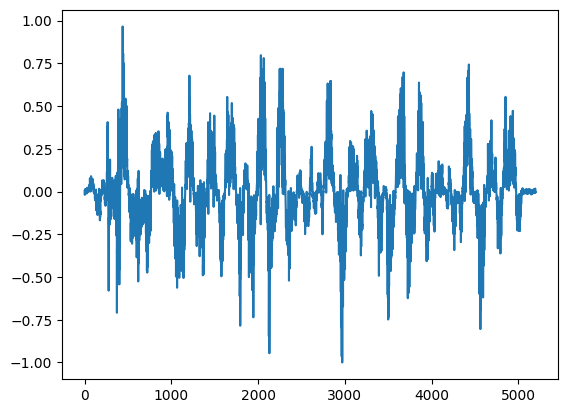

In [95]:
samples, samplerate = generate_morse_code_audio_file('e', '/Users/zuzannaglinka/gcpBackend/Algorithm/data/processed_audios/guitar.wav')
plt.plot(samples[:5200])

/var/folders/dc/tm97_rl10kj62c4gsppshgm80000gn/T/ipykernel_24685/1102319226.py:32: WavFileWarning: Chunk (non-data) not understood, skipping it.
  samplerate, data = wavfile.read(path)


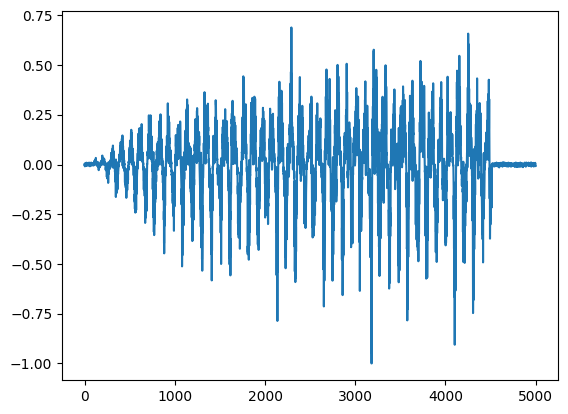

In [111]:
samples, samplerate = generate_morse_code_audio_file('e', '/Users/zuzannaglinka/gcpBackend/Algorithm/data/processed_audios/horn.wav')
plt.plot(samples[:5000])

/var/folders/dc/tm97_rl10kj62c4gsppshgm80000gn/T/ipykernel_24685/1102319226.py:32: WavFileWarning: Chunk (non-data) not understood, skipping it.
  samplerate, data = wavfile.read(path)


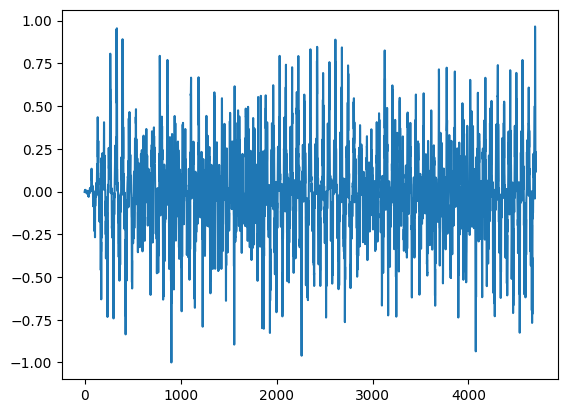

In [113]:
samples, samplerate = generate_morse_code_audio_file('e', '/Users/zuzannaglinka/gcpBackend/Algorithm/data/processed_audios/ring.wav')
plt.plot(samples[:4700])

/var/folders/dc/tm97_rl10kj62c4gsppshgm80000gn/T/ipykernel_24685/1102319226.py:32: WavFileWarning: Chunk (non-data) not understood, skipping it.
  samplerate, data = wavfile.read(path)


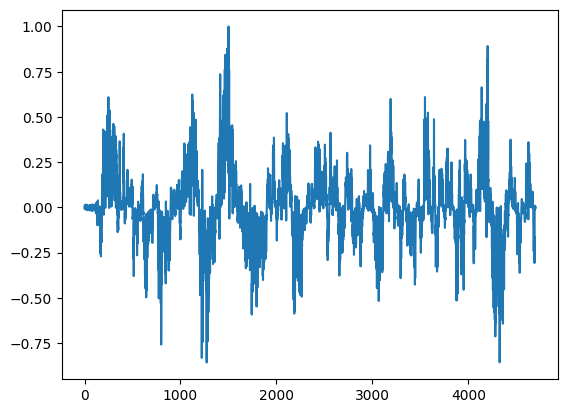

In [115]:
samples, samplerate = generate_morse_code_audio_file('e', '/Users/zuzannaglinka/gcpBackend/Algorithm/data/processed_audios/spaceship.wav')
plt.plot(samples[:4700])

In [31]:
translator_from_morse('...')

'S'

In [11]:
import librosa
import json
import pandas as pd
import numpy as np
from sklearn.metrics import silhouette_score
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import SpectralClustering


def dict_morse_to_text():
    # loading dictionary with translated letters to morse code
    with open('./Algorithm/data/morse_code.json', "r", encoding='utf-8') as file:
        morse_code = json.load(file)
    from_morse = {}
    for key, value in morse_code.items():
        from_morse[value] = key
    # print(from_morse)
    return from_morse


#  translating sentances into morse code
# def translator_from_morse(text):
#     from_morse = dict_morse_to_text()
#     return " ".join(["".join([from_morse.get("".join(sign.split(","))) for sign in word.split("_")]) for word in text.split(" ")])
def translator_from_text(text):
    from_morse = dict_morse_to_text()
    return " ".join("_".join([",".join([i for i in morse_code.get(i)]) for i in word]) for word in text.upper().split(" "))


def dict_class_to_morse(cluster_centers):
    dict = {}
    print(cluster_centers)
    if len(cluster_centers) == 1:
        dict[0] = '.'
    if len(cluster_centers[cluster_centers > 0]) == 1 and len(cluster_centers[cluster_centers < 0]) == 1:
        dict[0] = ','
        dict[1] = '.'
    elif len(cluster_centers[cluster_centers > 0]) == 1 and len(cluster_centers[cluster_centers < 0]) == 2:
        if (abs(cluster_centers[1]) - cluster_centers[2])**2 < (abs(cluster_centers[0]) - cluster_centers[2])**2:
        # if abs(cluster_centers[0]) > cluster_centers[cluster_centers>0][0]>abs(cluster_centers[1]):
            dict[0] = '_'
            dict[1] = ','
            dict[2] = '.'
        # elif abs(cluster_centers[0]) < cluster_centers[cluster_centers>0][0]:
        else:
            dict[0] = '_'
            dict[1] = ','
            dict[2] = '-'
    elif len(cluster_centers[cluster_centers > 0]) == 2 and len(cluster_centers[cluster_centers < 0]) == 1:
        if (abs(cluster_centers[0]) - cluster_centers[1])**2 < (abs(cluster_centers[0]) - cluster_centers[2])**2:
            dict[0] = ','
            dict[1] = '.'
            dict[2] = '-'
        elif (abs(cluster_centers[0])-cluster_centers[2])**2 < cluster_centers[cluster_centers>0][0]**2:
            dict[0] = '_'
            dict[1] = '.'
            dict[2] = '-'
        else:
            dict[0] = ' '
            dict[1] = '.'
            dict[2] = '-'
    elif len(cluster_centers[cluster_centers > 0]) == 2 and len(cluster_centers[cluster_centers < 0]) == 2:
        print(cluster_centers)
        if (abs(cluster_centers[0]) - cluster_centers[cluster_centers>0][1])**2  > cluster_centers[cluster_centers>0][0]**2 and (abs(cluster_centers[1]) - cluster_centers[cluster_centers>0][1])**2  < cluster_centers[cluster_centers>0][0]**2:
            dict[0] = ' '
            dict[1] = '_'
            dict[2] = '.'
            dict[3] = '-'
        if (abs(cluster_centers[0]) - cluster_centers[cluster_centers>0][1])**2  > cluster_centers[cluster_centers>0][0]**2 and (abs(cluster_centers[1]) - cluster_centers[cluster_centers>0][1])**2  > cluster_centers[cluster_centers>0][0]**2:
            dict[0] = ' '
            dict[1] = ','
            dict[2] = '.'
            dict[3] = '-'
        else:
            print("opcja 2")
            dict[0] = '_'
            dict[1] = ','
            dict[2] = '.'
            dict[3] = '-'

    elif len(cluster_centers) == 5:
        dict[0] = ' '
        dict[1] = '_'
        dict[2] = ','
        dict[3] = '.'
        dict[4] = '-'
    return dict


def sound_translator(path):
    samples, sampling_rate = librosa.load(path, sr=10000, mono=True, offset=0.0
                        , duration=None)
    print(samples)
    max_abs_scaler = preprocessing.MaxAbsScaler()
    new_samples = max_abs_scaler.fit_transform(np.array(samples).reshape(1,-1).T)
    # new_samples = ((pd.Series(samples) - min(samples)) * (1 - (-1))) / (max(samples) - min(samples)) + (-1)
    threshold =np.mean(list(map(lambda i: abs(i), new_samples)))
    bin_samples = [1 if abs(new_val)>threshold else 0 for new_val in new_samples]
    bin_samples = bin_samples[bin_samples.index(1):max([i for i ,e in enumerate(bin_samples) if e == 1])+1]
    bin_samples = bin_samples[bin_samples.index(1):max([i for i ,e in enumerate(bin_samples) if e == 1])+1]
    border = 100
    new_bin_samples =  [1 for i in range(border)] + \
    [(1 if (bin_samples[i] ==1 or (np.sum(bin_samples[i-border:i]) > 0 and np.sum(bin_samples[i:i+border]) > 0)) else 0) \
     for i in list(range(border, len(bin_samples)-border))] + \
          [1 for i in range(border)]
    
    new_list = []
    k = 0
    for i in range(len(new_bin_samples)-1):
        if new_bin_samples[i] != new_bin_samples[i+1]:
            if new_bin_samples[i] == 1:
                new_list.append(i-k+1)
            else:
                new_list.append(-(i+1-k))
            k = i 
    new_list.append(len(new_bin_samples)-k)
    # new_list = [i for i in new_list if abs(i)>max(new_list)/10]
    new_list = [i for i in new_list if abs(i)>200]
    scaler = StandardScaler()
    scaled = scaler.fit_transform(np.array([i for i in new_list]).reshape(1,-1).T)
    silhouette_coefficients = []
    if(len(scaled)>1):
        for k in range(2, 6):
            if(len(scaled)>k):
                clustering = SpectralClustering(n_clusters=k).fit(scaled)
                score = silhouette_score(scaled, clustering.labels_)
                silhouette_coefficients.append(score)
                print(score)

        print(silhouette_coefficients)
        n_clust = silhouette_coefficients.index(max(silhouette_coefficients))+2
        clustering = SpectralClustering(n_clusters=n_clust)
        clustering.fit(scaled)
        
        df = pd.DataFrame(columns = ['length', 'class'])
        df['length'] = new_list
        df['class'] = clustering.labels_
    else:
        n_clust = 1
        df = pd.DataFrame(columns = ['length', 'class'])
        df['length'] = new_list
        df['class'] = 0

    cB0 =df['class']
    ord_idx=np.argsort(df.groupby(['class']).mean()['length'])
    cntrs = np.zeros_like(cB0)-1
    for i in np.arange(n_clust):
        cntrs[cB0==ord_idx[i]]=i

    df = pd.DataFrame(columns = ['length', 'class'])
    df['length'] = new_list
    df['class'] = cntrs
    dict = dict_class_to_morse(np.array([np.sort(df.groupby(['class']).mean()['length'])]).T)
    # print(df['class'])
    # print("".join([dict.get(i) for i in df['class']]))
    try:
        return translator_from_morse("".join([dict.get(i) for i in df['class']])) 
    except:
        return "Cant translate sound"

In [5]:
max_abs_scaler = preprocessing.MaxAbsScaler()
new_samples = max_abs_scaler.fit_transform(np.array(samples).reshape(1,-1).T)
# new_samples = ((pd.Series(samples) - min(samples)) * (1 - (-1))) / (max(samples) - min(samples)) + (-1)
threshold =np.mean(list(map(lambda i: abs(i), new_samples)))
bin_samples = [1 if abs(new_val)>threshold else 0 for new_val in new_samples]
bin_samples = bin_samples[bin_samples.index(1):max([i for i ,e in enumerate(bin_samples) if e == 1])+1]
bin_samples = bin_samples[bin_samples.index(1):max([i for i ,e in enumerate(bin_samples) if e == 1])+1]
border = 100
new_bin_samples =  [1 for i in range(border)] + \
[(1 if (bin_samples[i] ==1 or (np.sum(bin_samples[i-border:i]) > 0 and np.sum(bin_samples[i:i+border]) > 0)) else 0) \
    for i in list(range(border, len(bin_samples)-border))] + \
        [1 for i in range(border)]


NameError: name 'samples' is not defined

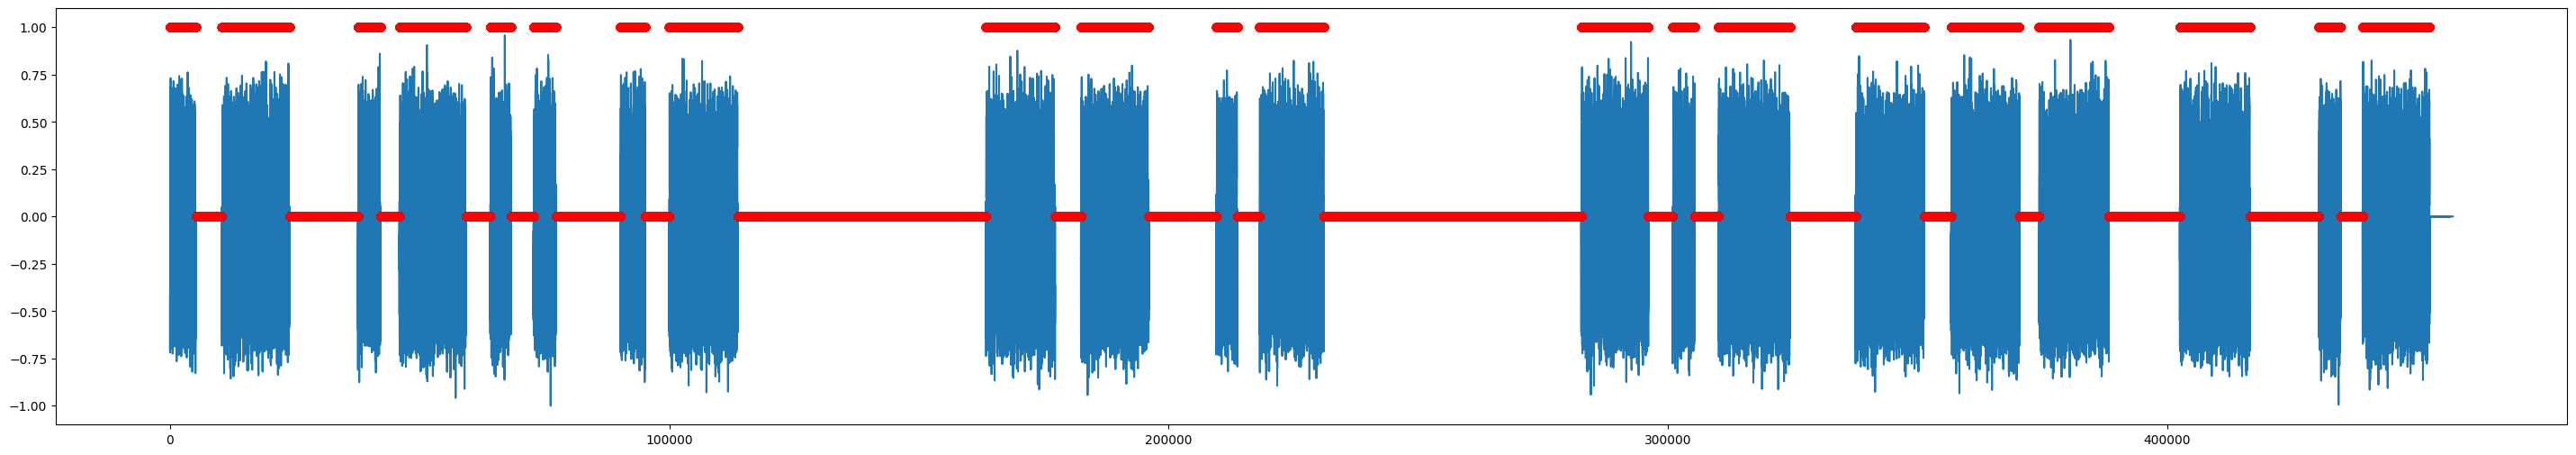

In [113]:
fig = plt.figure(figsize=(36, 6))
# plt.scatter([i for i, e in enumerate(new_bin_samples) if e == 1], [0 for i in new_bin_samples if i ==1],color = 'red', zorder =2)
plt.scatter([i for i, e in enumerate(new_bin_samples)],  new_bin_samples,color = 'red', zorder =2)

plt.plot(range(len(new_samples)), new_samples, zorder = 1)
plt.show()

In [114]:

new_list = []
k = 0
for i in range(len(new_bin_samples)-1):
    if new_bin_samples[i] != new_bin_samples[i+1]:
        if new_bin_samples[i] == 1:
            new_list.append(i-k+1)
        else:
            new_list.append(-(i+1-k))
        k = i 
new_list.append(len(new_bin_samples)-k)
# new_list = [i for i in new_list if abs(i)>max(new_list)/10]
new_list = [i for i in new_list if abs(i)>100]
scaler = StandardScaler()
scaled = scaler.fit_transform(np.array([i for i in new_list]).reshape(1,-1).T)
silhouette_coefficients = []
if(len(scaled)>1):
    for k in range(2, 6):
        if(len(scaled)>k):
            clustering = SpectralClustering(n_clusters=k).fit(scaled)
            score = silhouette_score(scaled, clustering.labels_)
            silhouette_coefficients.append(score)
            print(score)

    print(silhouette_coefficients)
    n_clust = silhouette_coefficients.index(max(silhouette_coefficients))+2
    clustering = SpectralClustering(n_clusters=n_clust)
    clustering.fit(scaled)
    
    df = pd.DataFrame(columns = ['length', 'class'])
    df['length'] = new_list
    df['class'] = clustering.labels_
else:
    n_clust = 1
    df = pd.DataFrame(columns = ['length', 'class'])
    df['length'] = new_list
    df['class'] = 0

0.7812336870695543
0.7334416268060845
0.7132132296198994
0.9440856387051728
[0.7812336870695543, 0.7334416268060845, 0.7132132296198994, 0.9440856387051728]


(array([ 1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  4.,  2.,  0.,  0.,  0.,  0.,  0., 10.,  2.,  0.,  0.,
         0.,  0.,  0.,  7.,  1.,  0.,  0.,  0.,  0.,  1., 12.]),
 array([-51564. , -50245.2, -48926.4, -47607.6, -46288.8, -44970. ,
        -43651.2, -42332.4, -41013.6, -39694.8, -38376. , -37057.2,
        -35738.4, -34419.6, -33100.8, -31782. , -30463.2, -29144.4,
        -27825.6, -26506.8, -25188. , -23869.2, -22550.4, -21231.6,
        -19912.8, -18594. , -17275.2, -15956.4, -14637.6, -13318.8,
        -12000. , -10681.2,  -9362.4,  -8043.6,  -6724.8,  -5406. ,
         -4087.2,  -2768.4,  -1449.6,   -130.8,   1188. ,   2506.8,
          3825.6,   5144.4,   6463.2,   7782. ,   9100.8,  10419.6,
         11738.4,  13057.2,  14376. ]),
 <BarContainer object of 50 artists>)

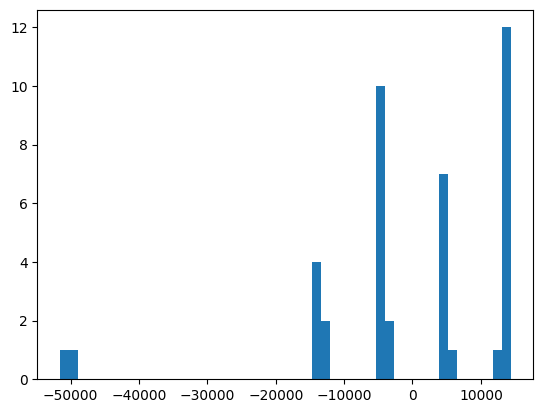

In [115]:
plt.hist([i for i in new_list if abs(i)>100], 50)

In [32]:
#  translating sentances into morse code
def translator_from_morse(text):
    from_morse = dict_morse_to_text()
    return " ".join(["".join([from_morse.get("".join(sign.split(","))) for sign in word.split("_")]) for word in text.split(" ")])



In [33]:


cB0 =df['class']
ord_idx=np.argsort(df.groupby(['class']).mean()['length'])
cntrs = np.zeros_like(cB0)-1
for i in np.arange(n_clust):
    cntrs[cB0==ord_idx[i]]=i

df = pd.DataFrame(columns = ['length', 'class'])
df['length'] = new_list
df['class'] = cntrs
dict = dict_class_to_morse(np.array([np.sort(df.groupby(['class']).mean()['length'])]).T)
# print(df['class'])
# print("".join([dict.get(i) for i in df['class']]))
# try:
translator_from_morse("".join([dict.get(i) for i in df['class']])) 
# except:
    # return "Cant translate sound"

[[-47043.5       ]
 [-12621.66666667]
 [ -4269.08333333]
 [  4229.25      ]
 [ 12836.84615385]]


'ALA MA KOTA'

In [30]:
results_df = pd.read_csv('./test_tmp/test_results.csv')
results_df.head()

,orig_message,message_after_translation,source,word_cnt,letter_cnt,accuracy_sentence,accuracy_word,accuracy_letter
0,8543232,8543232,alert,7,7,1,1.0,1.0
1,8543232,8543232,electric,7,7,1,1.0,1.0
2,8543232,8543232,beep,7,7,1,1.0,1.0
3,8543232,8543232,doorbell,7,7,1,1.0,1.0
4,8543232,8543232,bell,7,7,1,1.0,1.0


In [48]:
results_df.groupby('source').mean(['accuracy_sentence', 'accuracy_word', 'accuracy_letter']).round(2)[['accuracy_sentence',	'accuracy_word',	'accuracy_letter']]

,accuracy_sentence,accuracy_word,accuracy_letter
source,,,
alert,0.70,0.75,0.76
beep,0.88,0.88,0.90
beep2,0.86,0.86,0.88
bell,0.96,0.96,0.96
doorbell,0.96,0.96,0.96
electric,0.94,0.94,0.94
guitar,0.96,0.96,0.96
horn,0.90,0.90,0.92
ring,0.96,0.96,0.96


In [62]:
def f(d):
    x = {}
    x['acc_words'] = sum(d['accuracy_word'] * d['word_cnt'])/sum(d['word_cnt'])
    x['acc_letters'] = sum(d['accuracy_letter'] * d['letter_cnt'])/sum(d['letter_cnt'])
    x['acc_sentences'] = d['accuracy_sentence'].mean()
    return pd.Series(x, index=['acc_sentences', 'acc_words', 'acc_letters'])




In [66]:
summary = results_df.groupby('source').apply(f).round(3)
summary

,acc_sentences,acc_words,acc_letters
source,,,
alert,0.70,0.756,0.771
beep,0.88,0.989,0.991
beep2,0.86,0.948,0.951
bell,0.96,0.997,0.997
doorbell,0.96,0.997,0.997
electric,0.94,0.963,0.966
guitar,0.96,0.997,0.997
horn,0.90,0.985,0.988
ring,0.96,0.997,0.997


In [67]:
summary.mean()

acc_sentences    0.896364
acc_words        0.962364
acc_letters      0.965091
dtype: float64

In [51]:
results_df.groupby('source').agg(
   {
        sum(results_df['accuracy_word'] * results_df['word_cnt'])/sum(results_df['word_cnt']),
        sum(results_df['accuracy_letter'] * results_df['letter_cnt'])/sum(results_df['letter_cnt'])

   }
)[['accuracy_sentence', 'accuracy_word', 'accuracy_letter']]

TypeError: 'float' object is not callable

In [33]:
sum(results_df['accuracy_word'] * results_df['word_cnt'])/sum(results_df['word_cnt'])

0.9625339265228462

In [34]:
sum(results_df['accuracy_letter'] * results_df['letter_cnt'])/sum(results_df['letter_cnt'])

0.9652301045904672